# Model selection

```{figure} https://miro.medium.com/max/1125/1*_7OPgojau8hkiPUiHoGK_w.png
:align: center
```

## Underfitting

* the model is too simple
* the number of parameters is too low

## Overfitting

* the model is too complex
* the number of parameters is too large

## Train and test

The common way to reveal overfitting is to use **train** and **test** datasets.

* training dataset $\mathcal D_{\mathrm{train}} = (\boldsymbol X_{\mathrm{train}}, \boldsymbol y_{\mathrm{train}})$ is used on learning stage:

$$
    \mathcal L_{\mathrm{train}}(\boldsymbol \theta) = \frac 1{N_{\mathrm{train}}}\sum\limits_{(\boldsymbol x_i, y_i) \in \mathcal D_{\mathrm{train}}} \ell(y_i, f_{\boldsymbol \theta}(\boldsymbol x_i)) \to \min\limits_{\boldsymbol \theta}
$$

* test dataset $\mathcal D_{\mathrm{test}} = (\boldsymbol X_{\mathrm{test}}, \boldsymbol y_{\mathrm{test}})$ used for evlaluation of model's quality:

$$
    \mathcal L_{\mathrm{test}}(\boldsymbol \theta) = \frac 1{N_{\mathrm{test}}}\sum\limits_{(\boldsymbol x_i, y_i) \in \mathcal D_{\mathrm{test}}} \ell(y_i, f_{\boldsymbol \theta}(\boldsymbol x_i))
$$


```{figure} https://vitalflux.com/wp-content/uploads/2020/12/overfitting-and-underfitting-wrt-model-error-vs-complexity.png
:align: center
```

## A classical example

* Ground truth: $y(x) = \frac 1{1 + 25x^2}$, $-2\leqslant x \leqslant 2$
* Polynomial regression model: $f_{\boldsymbol \theta}(x) = \sum\limits_{k=0}^n \theta_k x^k$
* Training set: $X = \Big\{x_i = 4\frac{i-1}{N-1} - 2\Big\}_{i=1}^N$

* Test set: $\tilde X = \Big\{\tilde x_i = 4\frac{i-0.5}{N-1} - 2\Big\}_{i=1}^{N-1}$

* Loss function — MSE: 

    $$
    \mathcal L_{\mathrm{train}}(\boldsymbol \theta, X) = \frac 1N \sum\limits_{i=1}^N (f_{\boldsymbol \theta}(x_i) - y_i)^2  \to \min\limits_{\boldsymbol \theta}
    $$

* What is happening with test loss

    $$
    \mathcal L_{\mathrm{test}}(\boldsymbol \theta, \tilde X) = \frac 1N \sum\limits_{i=1}^N (f_{\boldsymbol \theta}(\tilde x_i) - \tilde y_i)^2
    $$
    
as $n$ grows?

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib import rc
from scipy.special import expit

rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage[utf8]{inputenc}')
rc('text.latex', preamble=r'\usepackage[russian]{babel}')

font = {'family' : 'monospace',
        'size'   : 24,
        'weight' : 'heavy'
       }

rc('font', **font)

%config InlineBackend.figure_formats = ['svg']

def y(x):
    return 1./(1 + 25*x**2)

def plot_runge_train(l):
    plt.figure(figsize=(11, 6))
    xs = np.linspace(-2, 2, num=500)
    plt.plot(xs, y(xs), lw=2, c='r', label=r"$y=\frac 1{1+25x^2}$")
    train = np.linspace(-2, 2, num=l)
    test = train[:-1] + 2 / (l - 1)
    plt.scatter(train, y(train), c='b', label="train")
    plt.scatter(test, y(test), c='w', edgecolor='b', linewidth=1.5, label="test")
    plt.title(r"$N = {}$".format(l))
    plt.legend()
    plt.grid(ls=':')

from sklearn.linear_model import LinearRegression

def X(x, n):
    res = [np.ones_like(x)]
    for i in range(1, n+1):
        res.append(x**i)
    return np.vstack(res).T

def plot_runge_model(l, n):
    plt.figure(figsize=(11, 6))
    xs = np.linspace(-2, 2, num=500)
    plt.plot(xs, y(xs), lw=2, c='r', ls="--", label=r"$y=\frac 1{1+25x^2}$")
    train = np.linspace(-2, 2, num=l)
    test = train[:-1] + 2 / (l - 1)
    plt.scatter(train, y(train), c='b', label="train")
    plt.scatter(test, y(test), c='w', edgecolor='b', linewidth=1.5, label="test")
    
    X_train = X(train, n)
    X_test = X(test, n)
    lin_reg = LinearRegression(fit_intercept=False)
    lin_reg.fit(X_train, y(X_train))
    ys = lin_reg.predict(X(xs, n))
    plt.plot(xs, ys[:, 1], c='g', lw=2, label=r"$f_\theta(x)$")
    plt.legend()
    plt.title(r"$N = {}, n={}$".format(l, n))
    plt.grid(ls=':')
    
def plot_runge_scores(l, ns):
    plt.figure(figsize=(11, 6))
    train = np.linspace(-2, 2, num=l)
    test = train[:-1] + 2 / (l - 1)
    train_score, test_score = [], []
    for n in ns:
        X_train = X(train, n)
        X_test = X(test, n)
        lin_reg = LinearRegression(fit_intercept=False)
        lin_reg.fit(X_train, y(X_train))
        train_score.append(np.mean((lin_reg.predict(X_train) - y(X_train))**2))
        test_score.append(np.mean((lin_reg.predict(X_test) - y(X_test))**2))
        
    plt.semilogy(ns, train_score, c='r', lw=2, label=r"train loss")
    plt.semilogy(ns, test_score, c='b', lw=2, label=r"test loss")
    plt.xlim(ns[0], ns[-1])
    plt.xlabel(r"$n$")
    plt.ylabel(r"$\mathcal L$")
    plt.legend()
    plt.title(r"Scores, $N={}$".format(l))
    plt.grid(ls=':')

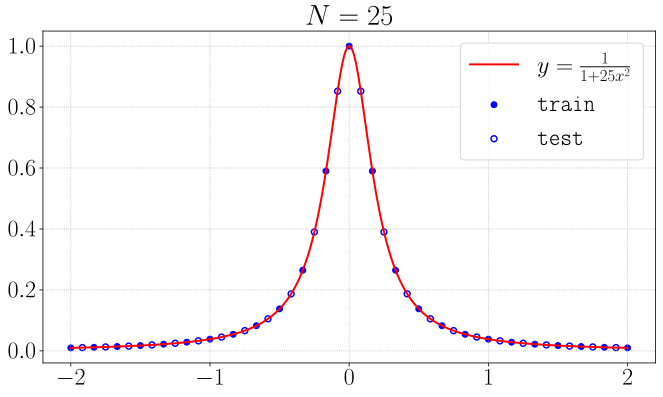

In [12]:
plot_runge_train(25)

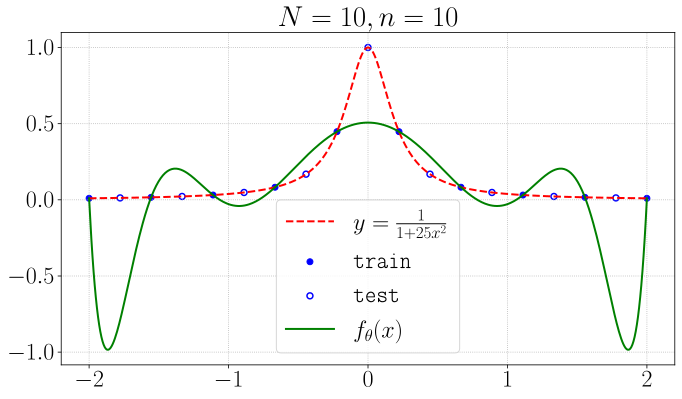

In [13]:
plot_runge_model(10, 10)

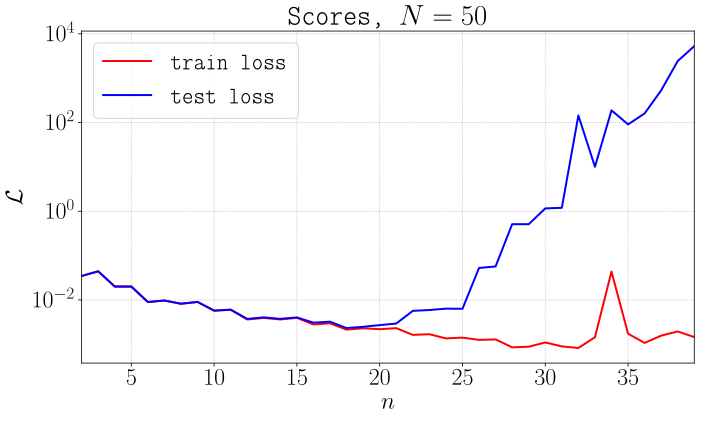

In [14]:
plot_runge_scores(50, np.arange(2, 40))

The overfitting is a big problem in ML because an overfitted model makes poor predictions. The first signal of the overfitting: $\mathcal L_{\mathrm{train}} \ll \mathcal L_{\mathrm{test}}$.

## Cross validation

```{figure} https://scikit-learn.org/stable/_images/grid_search_cross_validation.png
:align: center
```

```{admonition} TODO
:class: warning

* Add some text and original pictures
* Make Runge example interactive
* Show underfitting and overfitting on some real datasets
* Use comparison of k-NN and linear regression as it is done in the section 2.3 of {cite}`hastie2009elements`
```




